<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-d462c4460fe3>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


Tarea 2: Generar estadísticas descriptivas y visualizaciones.

Para todas las visualizaciones, incluya un título en cada gráfico y las etiquetas adecuadas
Genere lo siguiente y explique sus conclusiones:

1.	Para el "Valor medio de las viviendas ocupadas por sus propietarios" proporcione un diagrama de caja (boxplot)

2.	Proporcione un diagrama de barras para la variable "río Charles

3.	Proporcione un boxplot para la variable MEDV frente a la variable EDAD. (Discretice la variable edad en tres grupos de 35 años o menos, entre 35 y 70 años y 70 años o más)

4.	Proporcione un diagrama de dispersión para mostrar la relación entre las concentraciones de óxido nítrico y la proporción de acres comerciales no minoristas por ciudad. ¿Qué puede decir sobre la relación?

5.	Cree un histograma para la variable proporción de alumnos por profesor

In [5]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


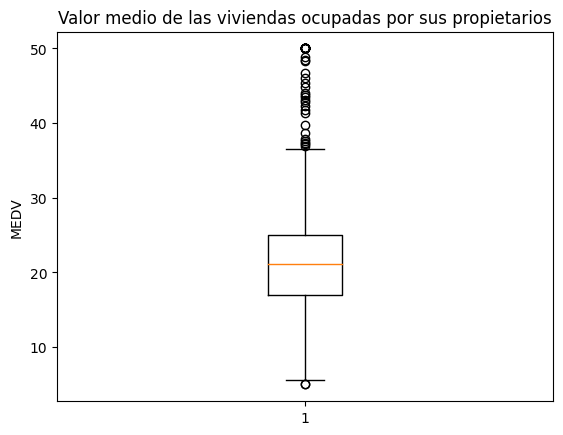

In [6]:
#Para el "Valor medio de las viviendas ocupadas por sus propietarios" proporcione un diagrama de caja (boxplot)
plt.boxplot(x=boston_df['MEDV'])
plt.ylabel("MEDV")
plt.title("Valor medio de las viviendas ocupadas por sus propietarios")
plt.show()


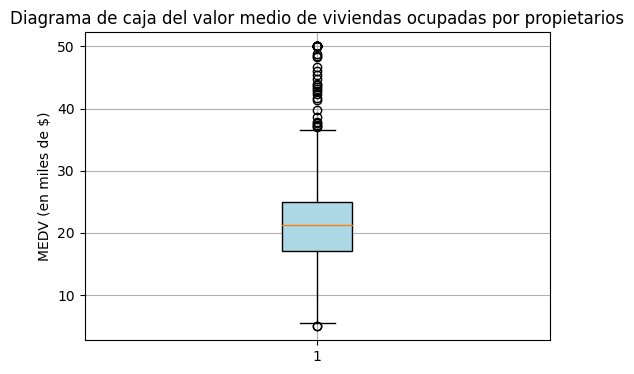

In [7]:
#Para el "Valor medio de las viviendas ocupadas por sus propietarios" proporcione un diagrama de caja (boxplot)
plt.figure(figsize=(6, 4))  # Tamaño del gráfico
plt.boxplot(boston_df['MEDV'], vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.ylabel("MEDV (en miles de $)")
plt.title("Diagrama de caja del valor medio de viviendas ocupadas por propietarios")
plt.grid(True)
plt.show()

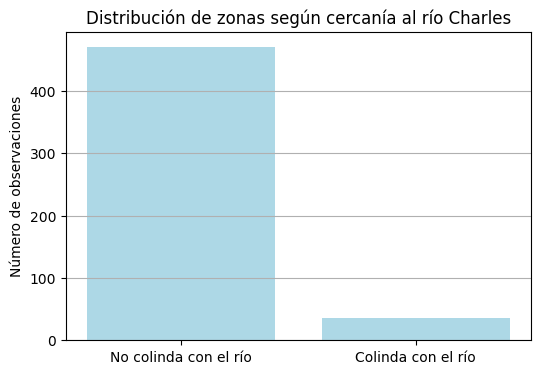

In [8]:
#Proporcione un diagrama de barras para la variable "río Charles}
chas_counts = boston_df['CHAS'].value_counts().sort_index()
plt.figure(figsize=(6,4))
plt.bar(chas_counts.index,chas_counts.values,color="lightblue")
plt.xticks([0, 1], ['No colinda con el río', 'Colinda con el río'])
plt.ylabel('Número de observaciones')
plt.title('Distribución de zonas según cercanía al río Charles')
plt.grid(axis='y')
plt.show()

<Figure size 800x500 with 0 Axes>

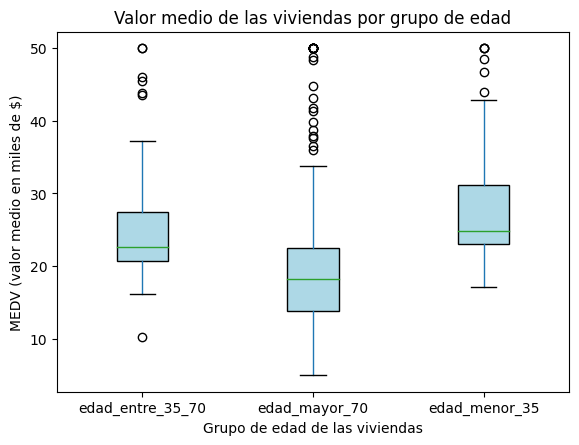

In [9]:
#Proporcione un boxplot para la variable MEDV frente a la variable EDAD. 
#(Discretice la variable edad en tres grupos de 35 años o menos, entre 35 y 70 años y 70 años o más)

boston_df.loc[(boston_df['AGE']<=35),'age_group']='edad_menor_35'
boston_df.loc[(boston_df['AGE']>35)&(boston_df['AGE']<70),'age_group']='edad_entre_35_70'
boston_df.loc[(boston_df['AGE']>=70),'age_group']='edad_mayor_70'
boston_df.head()

plt.figure(figsize=(8, 5))
boston_df.boxplot(column='MEDV', by='age_group', grid=False, patch_artist=True,
                  boxprops=dict(facecolor='lightblue'))

plt.title('Valor medio de las viviendas por grupo de edad')
plt.suptitle('')  # Elimina el título automático
plt.xlabel('Grupo de edad de las viviendas')
plt.ylabel('MEDV (valor medio en miles de $)')
plt.show()

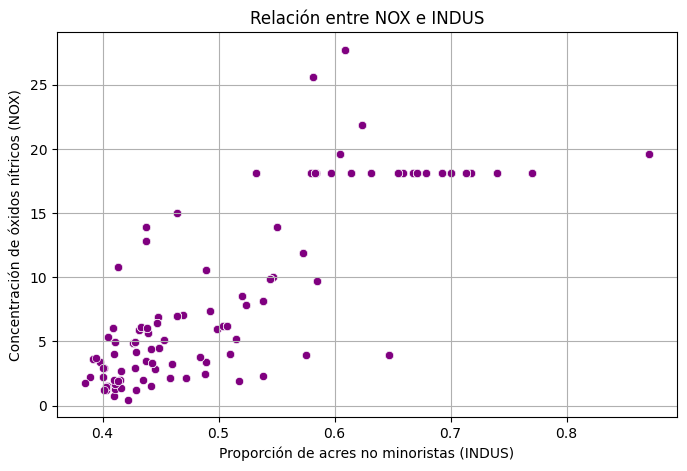

In [10]:
#Proporcione un diagrama de dispersión para mostrar la relación entre las concentraciones de óxido nítrico 
#y la proporción de acres comerciales no minoristas por ciudad. ¿Qué puede decir sobre la relación?

plt.figure(figsize=(8, 5))
sns.scatterplot(x=boston_df['NOX'],y=boston_df['INDUS'],color='purple')
plt.title('Relación entre NOX e INDUS')
plt.xlabel('Proporción de acres no minoristas (INDUS)')
plt.ylabel('Concentración de óxidos nítricos (NOX)')
plt.grid(True)
plt.show()

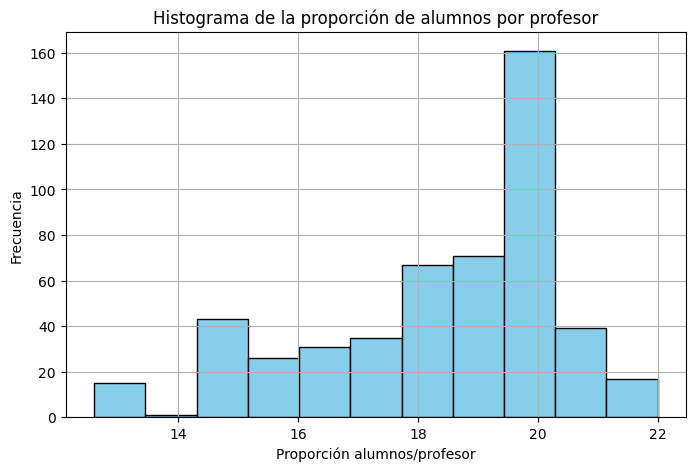

In [11]:
#Cree un histograma para la variable proporción de alumnos por profesor

plt.figure(figsize=(8, 5))
boston_df['PTRATIO'].plot(kind='hist', bins=11, color='skyblue', edgecolor='black')
plt.title('Histograma de la proporción de alumnos por profesor')
plt.xlabel('Proporción alumnos/profesor')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

Tarea 3: Utilice las pruebas adecuadas para responder a las preguntas que se le plantean.
Para cada una de las siguientes preguntas

•	¿Existe una diferencia significativa en el valor medio de las casas delimitadas por el río Charles o no? (Prueba T para muestras independientes)

•	¿Existe alguna diferencia en los valores medios de las casas (MEDV) para cada proporción de unidades ocupadas por sus propietarios construidas antes de 1940 (AGE)? (ANOVA)

•	¿Podemos concluir que no existe relación entre las concentraciones de óxido nítrico y la proporción de acres comerciales no minoristas por ciudad? (Correlación de Pearson)

•	¿Cuál es el impacto de una distancia ponderada adicional a los cinco centros de empleo de Boston sobre el valor medio de las viviendas ocupadas por sus propietarios? (Análisis de regresión)
Asegúrese de:

1.	Enunciar su hipótesis.

2.	Utilizar α = 0,05

3.	Realice la prueba Estadística.

4.	Exponga la conclusión de la prueba.


In [12]:
#¿Existe una diferencia significativa en el valor medio de las casas delimitadas 
#por el río Charles o no? (Prueba T para muestras independientes)
from scipy.stats import ttest_ind

print("Hipótesis nula (H₀): El valor medio de las viviendas es igual para ambos grupos: 𝜇1=𝜇0")
print("Hipótesis alternativa (H₁): El valor medio de las viviendas difiere entre los grupos: 𝜇1≠𝜇0")


medv_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
medv_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']

t_stat, p_val = ttest_ind(medv_1, medv_0, equal_var=False)

print('Estadistico t:', round(t_stat,4))
print('Valor p:',round(p_val,4))


# Conclusión rápida
if p_val < 0.05:
    print("Se rechaza la hipotesis nula, existe una diferencia significativa en el valor medio de las viviendas según la cercanía al río Charles.")
else:
    print("No se rechaza la hipotesis nula, no se encontró una diferencia significativa en el valor medio de las viviendas según la cercanía al río Charles.")


Hipótesis nula (H₀): El valor medio de las viviendas es igual para ambos grupos: 𝜇1=𝜇0
Hipótesis alternativa (H₁): El valor medio de las viviendas difiere entre los grupos: 𝜇1≠𝜇0
Estadistico t: 3.1133
Valor p: 0.0036
Se rechaza la hipotesis nula, existe una diferencia significativa en el valor medio de las viviendas según la cercanía al río Charles.


In [13]:
#¿Existe alguna diferencia en los valores medios de las casas (MEDV) para cada proporción 
#de unidades ocupadas por sus propietarios construidas antes de 1940 (AGE)? (ANOVA)
import scipy.stats as stats

print("Hipótesis nula (H₀): Las medias de MEDV son iguales para todos los grupos de AGE. 𝜇1=𝜇2=𝜇3=…")
print("Hipótesis alternativa (H₁): Al menos un grupo tiene una media diferente.")

grupo1 = boston_df[boston_df['age_group'] == 'edad_menor_35']['MEDV']
grupo2 = boston_df[boston_df['age_group'] == 'edad_entre_35_70']['MEDV']
grupo3 = boston_df[boston_df['age_group'] == 'edad_mayor_70']['MEDV']

# Realizar ANOVA
f_stat, p_val = stats.f_oneway(grupo1, grupo2, grupo3)

print("Estadistico F:",round(f_stat,4))
print("Valor p:",p_val)

if p_val < 0.05:
    print("Se rechaza H₀, indicando que hay diferencias significativas en al menos un grupo.")
else:
    print("No se rechaza H₀, indicando que no hay evidencia suficiente para decir que las medias difieren.")


Hipótesis nula (H₀): Las medias de MEDV son iguales para todos los grupos de AGE. 𝜇1=𝜇2=𝜇3=…
Hipótesis alternativa (H₁): Al menos un grupo tiene una media diferente.
Estadistico F: 36.4076
Valor p: 1.7105011022702984e-15
Se rechaza H₀, indicando que hay diferencias significativas en al menos un grupo.


In [14]:
# ¿Podemos concluir que no existe relación entre las concentraciones de óxido nítrico 
#y la proporción de acres comerciales no minoristas por ciudad? (Correlación de Pearson)

from scipy.stats import pearsonr

print("Hipótesis nula (H₀):No existe correlación lineal entre NOX y INDUS (coeficiente de correlación 𝑟=0).")
print("Hipótesis alternativa (H₁): Existe correlación lineal diferente de cero (𝑟≠0)")

r, p_val = pearsonr(boston_df['NOX'], boston_df['INDUS'])

print("Coeficiente de correlacion r:", round(r,4))
print("Valor p",p_val)

if p_val < 0.05:
    print("Se rechaza H₀, existe una relación estadísticamente significativa")
else:
    print("No se rechaza H₀,  no hay evidencia para afirmar que exista relación.")


Hipótesis nula (H₀):No existe correlación lineal entre NOX y INDUS (coeficiente de correlación 𝑟=0).
Hipótesis alternativa (H₁): Existe correlación lineal diferente de cero (𝑟≠0)
Coeficiente de correlacion r: 0.7637
Valor p 7.913361061210442e-98
Se rechaza H₀, existe una relación estadísticamente significativa


In [15]:
#¿Cuál es el impacto de una distancia ponderada adicional a los cinco centros de empleo 
#de Boston sobre el valor medio de las viviendas ocupadas por sus propietarios? (Análisis de regresión).

import statsmodels.api as sm

# Variables independientes y dependientes
X = boston_df['DIS']
y = boston_df['MEDV']

# Agregar constante para el intercepto
X = sm.add_constant(X)

# Ajustar modelo de regresión lineal
modelo = sm.OLS(y, X).fit()

# Resumen del modelo
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 06 Jul 2025   Prob (F-statistic):           1.21e-08
Time:                        21:22:28   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0